## this notebook takes the results of the ant-colony-optimizer notebook
- previous notebook will store the results of specifically the best ant which has the lowest cost
- the resulting features/tour it has used will be used in this notebook
- this notebook will train both the baseline and tuned models using the best ant's features/path it has made
- performance like binary accuracy, binary cross entropy, loss, validation binary accuracy, validation binary cross entropy, and validation loss will all be recorded with the use of the reduced dataset

## import libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

from utilities.data_preprocessor import preprocess
from utilities.data_visualizer import view_train_cross, train_cross_results_v2, view_final_metrics
from models.model_arcs import load_baseline, load_tuned

import json
import os

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## check current working directory

In [46]:
print(os.getcwd())

c:\Users\Mig\Desktop\projects\To Github\breast-cancer-classifier


## load data
- load the original data first

In [47]:
# use path below if in local machine
df = pd.read_csv('./data.csv')

# use path below if in google collab
# df = pd.read_csv('./sample_data/breast_cancer_data.csv')


X, Y = preprocess(df)
X_trains_orig, X_, Y_trains_orig, Y_ = train_test_split(X, Y, test_size=0.3, random_state=0)
X_cross_orig, X_tests_orig, Y_cross_orig, Y_tests_orig = train_test_split(X_, Y_, test_size=0.5, random_state=0)
# view_train_cross(X_trains_orig, X_cross_orig, Y_trains_orig, Y_cross_orig)

- [20, 16, 19, 14, 13, 11, 5, 3, 9, 28, 24, 15, 17, 21, 10] is the path of the best ant so use these feature indeces in loading the data with select features
- this dataset is the one with carefully selected features

In [48]:
features = df.columns[[20, 16, 19, 14, 13, 11, 5, 3, 9, 28, 24, 15, 17, 21, 10]]
features


Index(['symmetry_se', 'smoothness_se', 'concave points_se', 'perimeter_se',
       'texture_se', 'fractal_dimension_mean', 'area_mean', 'texture_mean',
       'concave points_mean', 'concavity_worst', 'perimeter_worst', 'area_se',
       'compactness_se', 'fractal_dimension_se', 'symmetry_mean'],
      dtype='object')

In [49]:
X_reduced, Y_reduced = preprocess(df, feat_idxs=features)
X_trains_reduced, X_, Y_trains_reduced, Y_ = train_test_split(X_reduced, Y_reduced, test_size=0.3, random_state=0)
X_cross_reduced, X_tests_reduced, Y_cross_reduced, Y_tests_reduced = train_test_split(X_, Y_, test_size=0.5, random_state=0)
# view_train_cross(X_trains_reduced, X_cross_reduced, Y_trains_reduced, Y_cross_reduced)

In [50]:
X_trains_orig

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
478,-0.749028,-1.093640,-0.740560,-0.710995,0.586383,-0.418088,-0.448455,-0.753936,-0.119089,0.417114,...,-0.801242,-0.615097,-0.751235,-0.725988,0.124117,-0.338840,-0.060394,-0.613574,0.065106,0.435246
303,-1.033042,-0.158159,-1.034246,-0.911788,0.742947,-0.711836,-0.826485,-0.802687,-1.203419,0.453972,...,-1.078732,-0.185190,-1.087219,-0.888068,0.391516,-0.953351,-0.901735,-0.751071,-1.112638,-0.306218
155,-0.533178,-0.314072,-0.564266,-0.553431,-0.698865,-0.711647,-0.627112,-0.660562,0.578241,-0.073377,...,-0.554813,-0.074456,-0.615412,-0.556174,-0.467667,-0.480063,-0.373672,-0.494807,0.343365,-0.145512
186,1.187949,-0.165140,1.096935,1.098139,-0.745834,-0.372605,-0.089257,0.237843,-0.695938,-1.211713,...,1.043864,0.111186,0.951324,0.930669,-0.393146,-0.062119,0.391533,0.647036,0.493818,-0.807177
101,-2.029648,-1.363580,-1.984504,-1.454443,1.468835,-0.543168,-1.114873,-1.261820,0.432204,2.180614,...,-1.726901,-0.999409,-1.693361,-1.222423,1.141110,-0.852841,-1.305831,-1.745063,0.050546,0.547186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,1.329956,0.160649,1.191672,1.271629,-0.507430,-0.862311,-0.107964,0.245323,-0.955155,-1.819865,...,0.764302,-0.224272,0.647508,0.624792,-0.353694,-0.879559,-0.245578,0.225259,-0.539944,-1.472721
9,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096,...,-0.244190,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856
359,-1.332393,-0.225644,-1.324225,-1.070205,0.323071,-0.848666,-0.774633,-0.899156,-1.115796,0.962892,...,-0.879933,-0.107025,-0.937396,-0.775210,0.040829,-0.950170,-0.756994,-0.975815,-0.722753,-0.143295
192,-1.251733,-0.248914,-1.286742,-1.043186,-1.911524,-1.533193,-1.114873,-1.261820,-0.579108,0.237079,...,-1.304866,-0.789340,-1.340697,-1.013934,-2.682695,-1.443878,-1.305831,-1.745063,-1.604443,-1.017203


In [51]:
X_trains_reduced

,symmetry_se,smoothness_se,concave points_se,perimeter_se,texture_se,fractal_dimension_mean,area_mean,texture_mean,concave points_mean,concavity_worst,perimeter_worst,area_se,compactness_se,fractal_dimension_se,symmetry_mean
478,-0.255754,-0.694688,-0.609606,-0.643074,-0.092266,0.417114,-0.710995,-1.093640,-0.753936,-0.060394,-0.751235,-0.571980,-0.242457,-0.068427,-0.119089
303,-0.318715,0.611365,-0.421281,-0.906430,0.628029,0.453972,-0.911788,-0.158159,-0.802687,-0.901735,-1.087219,-0.665707,-0.900724,-0.180768,-1.203419
155,-0.309029,-0.507680,-0.628098,-0.684162,-0.425561,-0.073377,-0.553431,-0.314072,-0.660562,-0.373672,-0.615412,-0.524236,-0.550967,-0.495851,0.578241
186,-1.192902,-1.391716,-0.823561,-0.519316,-1.344707,-1.211713,1.098139,-0.165140,0.237843,0.391533,0.951324,-0.251195,-0.910840,-1.024268,-0.695938
101,0.732247,1.049716,-1.913447,-0.650005,0.528240,2.180614,-1.454443,-1.363580,-1.261820,-1.305831,-1.693361,-0.671142,-0.818119,0.115403,0.432204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,-0.150416,0.176681,0.459680,-0.249030,-0.705514,-1.819865,1.271629,0.160649,0.245323,-0.245578,0.647508,-0.079142,-0.801352,-0.801478,-0.955155
9,-0.321136,0.036008,0.409395,-0.409420,0.693345,2.783096,-0.509063,1.105439,0.941760,3.995433,-0.286278,-0.360764,2.609587,2.377346,0.797298
359,-0.135886,-0.068329,-0.848541,0.198478,0.054696,0.962892,-1.070205,-0.225644,-0.899156,-0.756994,-0.937396,-0.216873,-0.921962,-0.409232,-1.115796
192,2.112542,-1.776065,-1.913447,-0.314869,6.655279,0.237079,-1.043186,-0.248914,-1.261820,-1.305831,-1.340697,-0.410268,-1.047490,-0.796939,-0.579108


## baseline model training and validation
- train the baseline model on both original dataset and reduced dataset

In [52]:
# import then load baseline model architecture
baseline_model_orig = load_baseline()
baseline_model_red = load_baseline()

# begin model training
baseline_history_orig = baseline_model_orig.fit(
    X_trains_orig, Y_trains_orig,
    epochs=100,
    validation_data=(X_cross_orig, Y_cross_orig),
    callbacks=[EarlyStopping(monitor='val_binary_crossentropy', patience=10)]
)

baseline_history_red = baseline_model_red.fit(
    X_trains_reduced, Y_trains_reduced,
    epochs=100,
    validation_data=(X_cross_reduced, Y_cross_reduced),
    callbacks=[EarlyStopping(monitor='val_binary_crossentropy', patience=10)]
)

# build the dictionary of results based on metric history of both models
baseline_results_orig = {}
baseline_results_red = {}
for metric in ['loss', 'binary_crossentropy', 'binary_accuracy', 'val_loss', 'val_binary_crossentropy', 'val_binary_accuracy']:
    if metric not in baseline_results_orig:
        baseline_results_orig[metric] = baseline_history_orig.history[metric]
    if metric not in baseline_results_red:
        baseline_results_red[metric] = baseline_history_red.history[metric]

Epoch 1/100
13/13 [==============================] - 1s 19ms/step - loss: 0.6230 - binary_crossentropy: 0.6230 - binary_accuracy: 0.6256 - val_loss: 0.5614 - val_binary_crossentropy: 0.5614 - val_binary_accuracy: 0.6941
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5609 - binary_crossentropy: 0.5609 - binary_accuracy: 0.6256 - val_loss: 0.4887 - val_binary_crossentropy: 0.4887 - val_binary_accuracy: 0.6941
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4999 - binary_crossentropy: 0.4999 - binary_accuracy: 0.6256 - val_loss: 0.4206 - val_binary_crossentropy: 0.4206 - val_binary_accuracy: 0.6941
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4413 - binary_crossentropy: 0.4413 - binary_accuracy: 0.6256 - val_loss: 0.3657 - val_binary_crossentropy: 0.3657 - val_binary_accuracy: 0.6941
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3914 - binary_crossentropy: 0.3914 - binary_accu

In [53]:
baseline_results_orig

{'loss': [0.623038649559021,
  0.560904324054718,
  0.49986761808395386,
  0.44132059812545776,
  0.3914433419704437,
  0.34947675466537476,
  0.3074842393398285,
  0.26483824849128723,
  0.2214931845664978,
  0.1849588304758072,
  0.15751923620700836,
  0.137559175491333,
  0.12177484482526779,
  0.11103279888629913,
  0.10274992883205414,
  0.09538038820028305,
  0.08962294459342957,
  0.08505947142839432,
  0.0812104120850563,
  0.07747039943933487,
  0.07411357760429382,
  0.07143347710371017,
  0.06885810941457748,
  0.0658850148320198,
  0.06376057863235474,
  0.06141357496380806,
  0.05972376838326454,
  0.05789056792855263,
  0.05606488883495331,
  0.054419875144958496,
  0.052550192922353745,
  0.05114978924393654,
  0.04937943443655968,
  0.04804668575525284,
  0.046597518026828766,
  0.045119769871234894,
  0.04356025904417038,
  0.042173851281404495,
  0.040967535227537155,
  0.039713311940431595,
  0.03872795030474663,
  0.03762099891901016,
  0.03654145821928978,
  0.0361

## results visualization

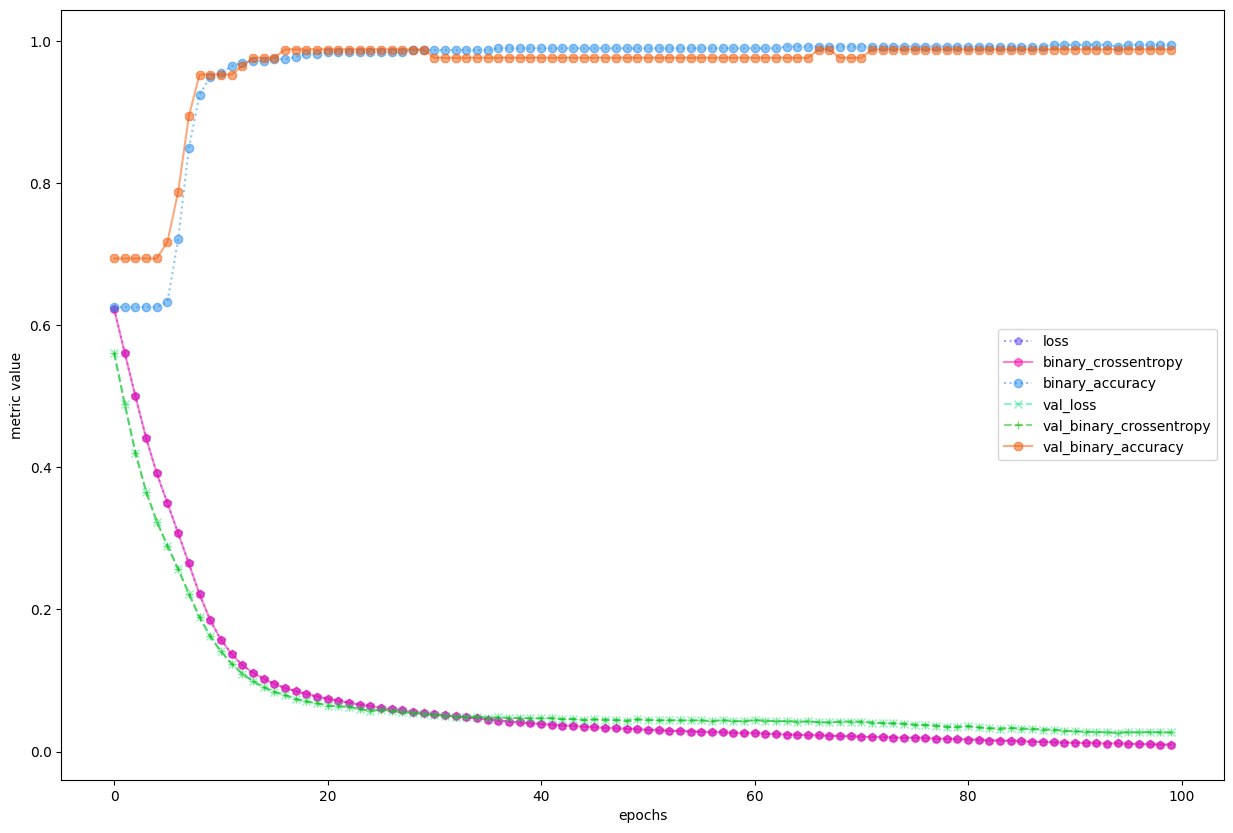

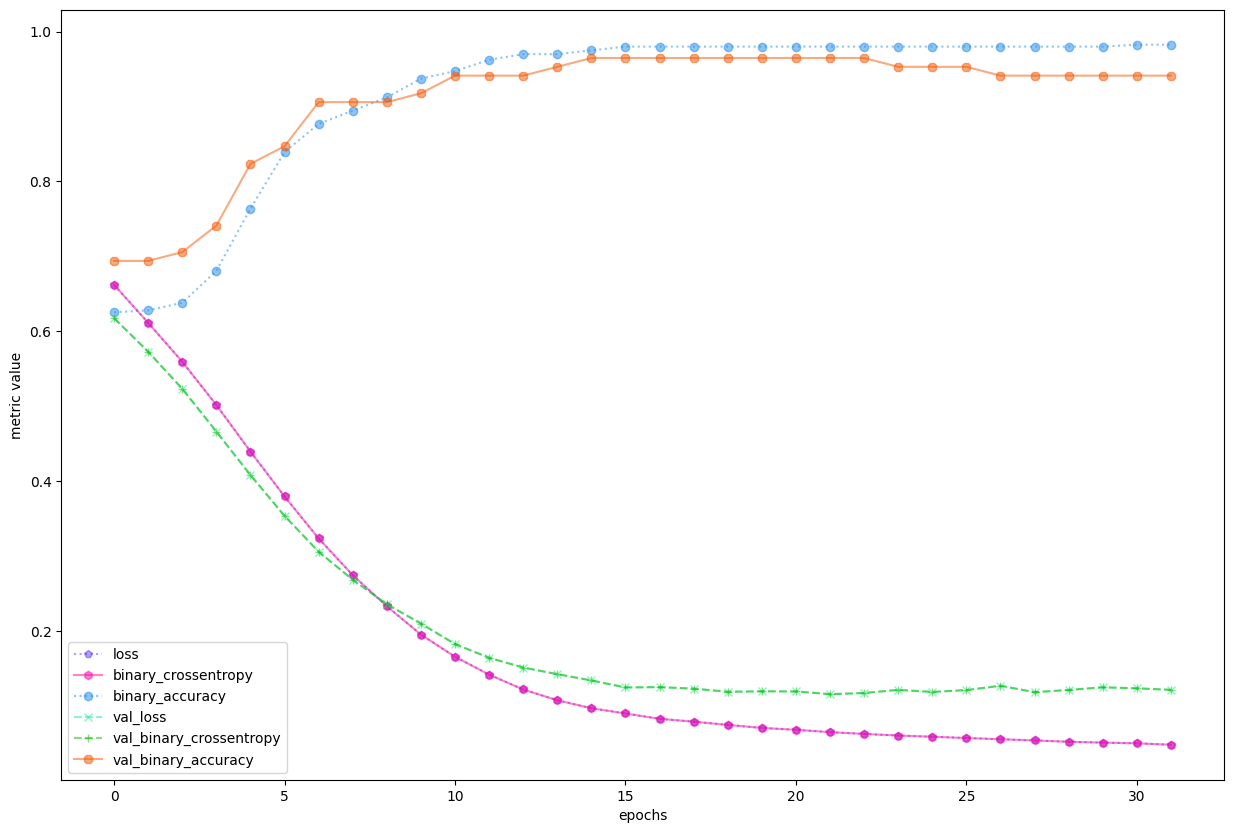

In [54]:
train_cross_results_v2(baseline_results_orig, epochs=baseline_history_orig.epoch[-1])
train_cross_results_v2(baseline_results_red, epochs=baseline_history_red.epoch[-1])

## tuned model training and validation

In [55]:
# import then load tuned model architecture
tuned_model_orig = load_tuned(param_file_path='./results/best_hyper_params.json')
tuned_model_red = load_tuned(param_file_path='./results/best_hyper_params.json')

# begin model training
tuned_history_orig = tuned_model_orig.fit(
    X_trains_orig, Y_trains_orig,
    epochs=100,
    validation_data=(X_cross_orig, Y_cross_orig),
    callbacks=[EarlyStopping(monitor='val_binary_crossentropy', patience=10)]
)

tuned_history_red = tuned_model_red.fit(
    X_trains_reduced, Y_trains_reduced,
    epochs=100,
    validation_data=(X_cross_reduced, Y_cross_reduced),
    callbacks=[EarlyStopping(monitor='val_binary_crossentropy', patience=10)]
)

# build the dictionary of results based on metric history of both models
tuned_results_orig = {}
tuned_results_red = {}
for metric in ['loss', 'binary_crossentropy', 'binary_accuracy', 'val_loss', 'val_binary_crossentropy', 'val_binary_accuracy']:
    if metric not in tuned_results_orig:
        tuned_results_orig[metric] = tuned_history_orig.history[metric]
    if metric not in tuned_results_red:
        tuned_results_red[metric] = tuned_history_red.history[metric]

{'layer_1': 201, 'layer_2': 901, 'layer_3': 101, 'layer_4': 601, 'activation': 'relu', 'learning_rate': 0.003, 'lambda': 0.01}
{'layer_1': 201, 'layer_2': 901, 'layer_3': 101, 'layer_4': 601, 'activation': 'relu', 'learning_rate': 0.003, 'lambda': 0.01}
Epoch 1/100
13/13 [==============================] - 2s 24ms/step - loss: 4.6208 - binary_crossentropy: 0.1936 - binary_accuracy: 0.8995 - val_loss: 1.8563 - val_binary_crossentropy: 0.0389 - val_binary_accuracy: 0.9765
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 1.0758 - binary_crossentropy: 0.0698 - binary_accuracy: 0.9799 - val_loss: 0.5226 - val_binary_crossentropy: 0.0703 - val_binary_accuracy: 0.9882
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.4297 - binary_crossentropy: 0.0709 - binary_accuracy: 0.9849 - val_loss: 0.3326 - val_binary_crossentropy: 0.0486 - val_binary_accuracy: 0.9765
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 0.3025 - binary

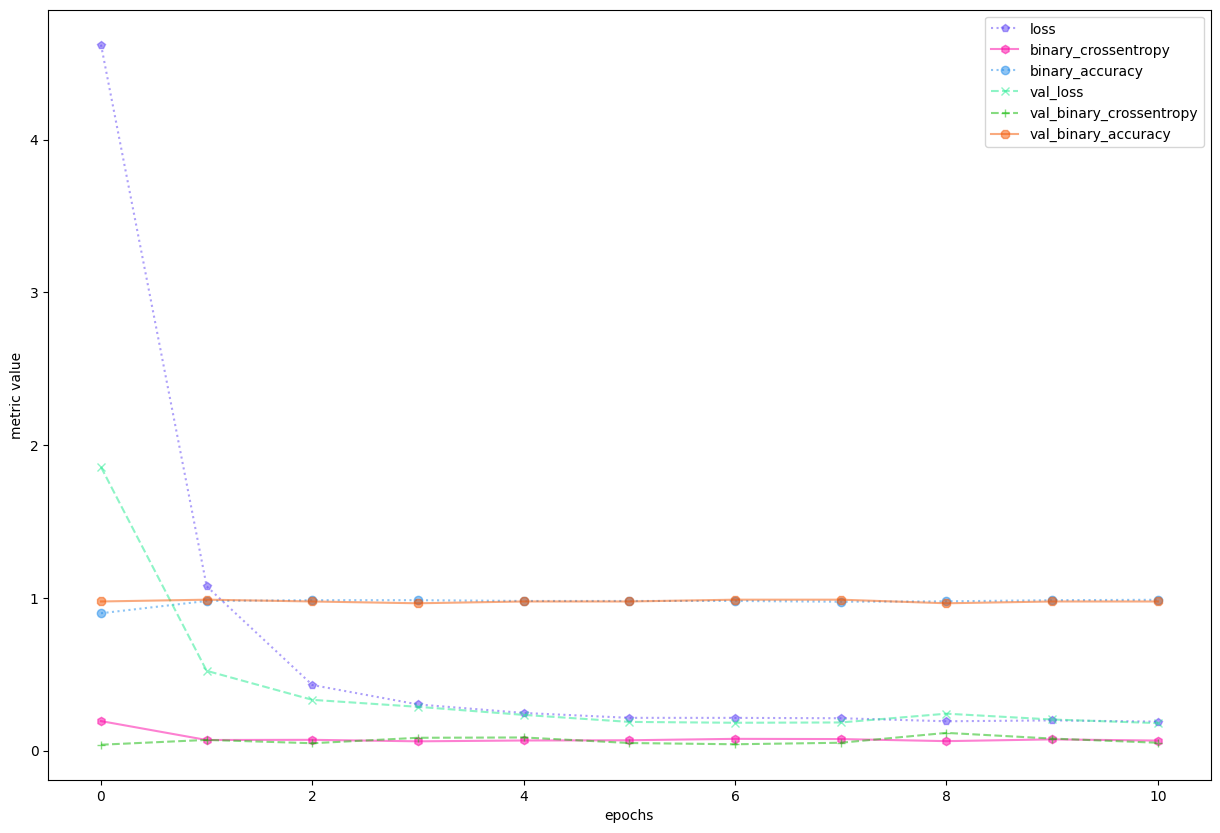

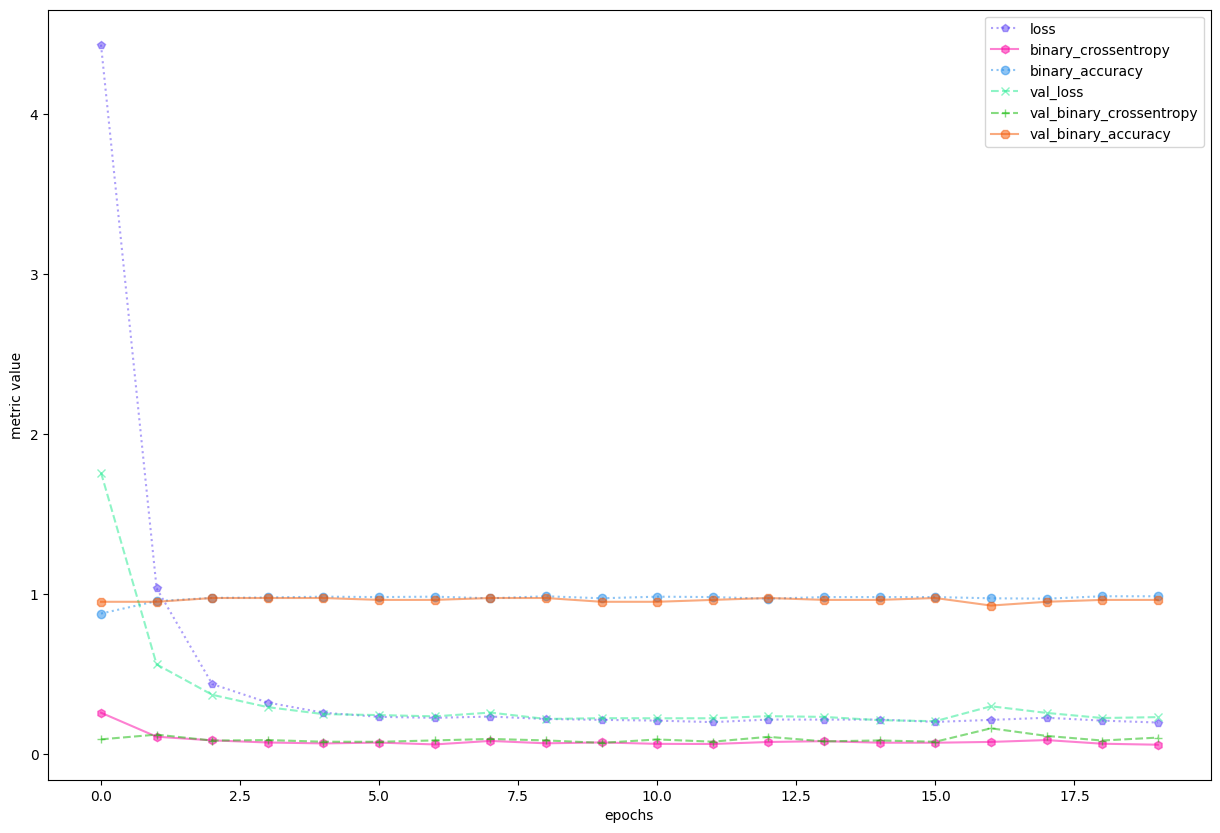

In [56]:
train_cross_results_v2(tuned_results_orig, epochs=tuned_history_orig.epoch[-1])
train_cross_results_v2(tuned_results_red, epochs=tuned_history_red.epoch[-1])

In [57]:
# display values from last epoch of baseline model
view_final_metrics(baseline_results_orig, 'BASELINE USING ORIGINAL DATASET RESULTS')
view_final_metrics(baseline_results_red, 'BASELINE USING REDUCED DATASET RESULTS')


BASELINE USING ORIGINAL DATASET RESULTS:
loss: 0.009646639227867126
binary_crossentropy: 0.009646639227867126
binary_accuracy: 0.9949748516082764
val_loss: 0.0268718209117651
val_binary_crossentropy: 0.0268718209117651
val_binary_accuracy: 0.9882352948188782

BASELINE USING REDUCED DATASET RESULTS:
loss: 0.04886476695537567
binary_crossentropy: 0.04886476695537567
binary_accuracy: 0.9824120402336121
val_loss: 0.1220489963889122
val_binary_crossentropy: 0.1220489963889122
val_binary_accuracy: 0.9411764740943909


In [58]:
# display values from last epoch of tuned model
view_final_metrics(tuned_results_orig, 'TUNED MODEL USING ORIGINAL DATASET RESULTS')
view_final_metrics(tuned_results_red, 'TUNED MODEL USING REDUCED DATASET RESULTS')


TUNED MODEL USING ORIGINAL DATASET RESULTS:
loss: 0.19000405073165894
binary_crossentropy: 0.0660259872674942
binary_accuracy: 0.9874371886253357
val_loss: 0.18028786778450012
val_binary_crossentropy: 0.05181005224585533
val_binary_accuracy: 0.9764705896377563

TUNED MODEL USING REDUCED DATASET RESULTS:
loss: 0.19812512397766113
binary_crossentropy: 0.059408750385046005
binary_accuracy: 0.9874371886253357
val_loss: 0.23185595870018005
val_binary_crossentropy: 0.10397979617118835
val_binary_accuracy: 0.9647058844566345


In [59]:
# # save baseline model
# baseline_model.save('./models/baseline_model.h5')

# # save results of trained model
# with open("./results/baseline_model_results.json", "w") as out_file:
#     json.dump(baseline_results, out_file)